# Milestone 1 - Phase 2

# Perkenalan

`Rio Armiga - FTDS012`

Dataset : Telco Customer Churn Dataset

`Problem Statements` 

Banyaknya pelanggan yang berhenti berlangganan layanan telco kita tanpa diketahui penyebabnya sehingga tidak dapat dilakukan preventif agar pelanggan tidak berhenti berlangganan


`Objective`

Membuat model classification menggunakan algioritma ANN untuk melakukan prediksi awal apakah pelanggan akan churn/ berhenti berlangganan atau tidak sehingga dapat dilakuakn tindakan preventif jika pelanggan diprediksi akan berhenti berlangganan.

In [246]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
import tensorflow as tf
from keras.models import Sequential, Model
from keras.optimizers import Adamax
from keras.layers import Dense, concatenate, Input
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score
import pickle

# Data Loading

In [97]:
data = pd.read_csv('Telco_Customer_Churn.csv')
pd.set_option('display.max.columns', None)
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Mengganti tipe data pada kolom TotalCharges karena kolom TotalCharges bertipe data object, tetapi seharusnya bertipe data int atau float karena data merupakan data numeric.

In [99]:
# data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], downcast="float")
# print(data.dtypes)

- Terdapat error saat melakuakan pergantian tipe data, karena terdapat string kosong pada kolom TotalCharges.

Mengganti data string kosong dengan np.nan agar mudah dideteksi sebagai missing value

In [100]:
data = data.replace(" ", np.nan)

Melakukan check missing value pada data.

In [101]:
data.isna().sum().sort_values(ascending=False).head(3)

TotalCharges      11
Churn              0
OnlineSecurity     0
dtype: int64

- Sudah terdeteksi missing value pada kolom TotalCharges

Melakukan drop baris pada data missing value

In [102]:
data = data.dropna(axis=0)

In [103]:
data.isna().sum().sort_values(ascending=False).head(3)

Churn             0
OnlineSecurity    0
gender            0
dtype: int64

Missing value berhasil di drop.

Merubah tipe data pada kolom TotalCharges

In [104]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], downcast="float")
print(data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float32
Churn                object
dtype: object


- Tipe data pada kolom TotalCharges berhasil dirubah

# Exploratory Data Analysis (EDA)

Function untuk menunjukkan persentase pada grafik.

In [105]:
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)

def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

Melihat presentase churn

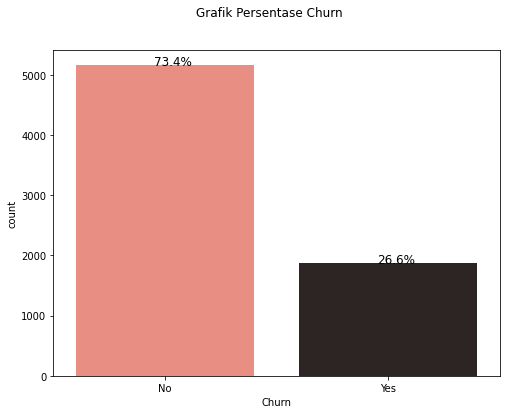

In [106]:
plt.figure(figsize=(8, 6))
plt.suptitle('Grafik Persentase Churn')
ax = sns.countplot(data=data, x='Churn', palette='dark:salmon_r')
without_hue(ax, data.Churn)

- Sebesar 73.4% pelanggan tetap menggunakan produk yang kita tawarkan sedangkan 26.6% pelanggan akan berhenti berlangganan.

Apakah metode pembayaran berpengaruh terhadap churn?

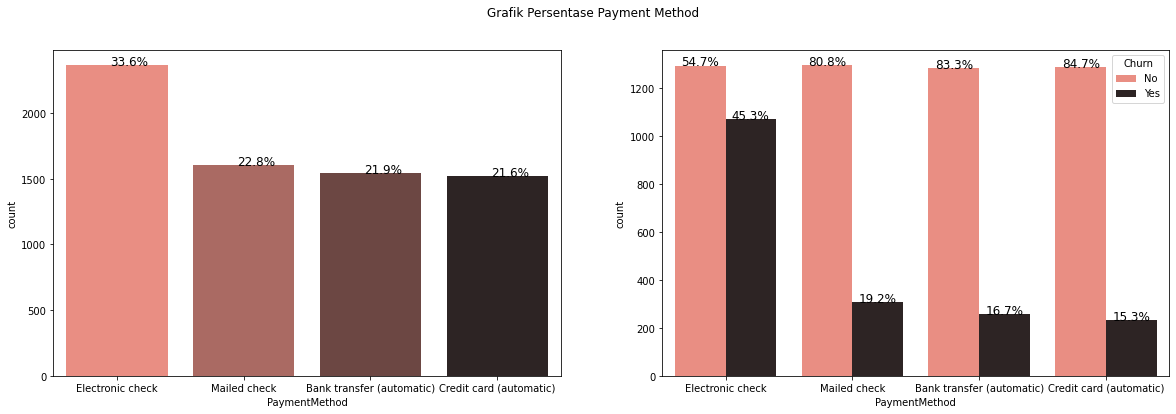

In [107]:
plt.figure(figsize=(20, 6))
plt.suptitle('Grafik Persentase Payment Method')
plt.subplot(1,2,1)
ax = sns.countplot(data=data, x='PaymentMethod', palette='dark:salmon_r')
without_hue(ax, data.PaymentMethod)

plt.subplot(1,2,2)
ax = sns.countplot(data=data, x='PaymentMethod', hue='Churn', palette='dark:salmon_r')
with_hue(ax, data.PaymentMethod, 4,2)

- Berdasarkan Grafik Persentase Payment Method, terlihat pelanggan yang membayar tagihan dengan electronic check menjadi yang tertinggi di data dengan 33.6% dan yang terendah adalah dengan credit card (auto) dengan 21.6%.
- Dapat dilihat pula pelanggan dengan yang membayar tagihan dengan electronic check juga menjadi pelanggan yang paling tinggi persentase churnnya dengan persentase sebesar 45.3% pelanggan akan churn, sedangkan pelanggan dengan loyalitas tinggi adalah pelanggan dengan metode pembayaran credit card (auto) dengan presentase 15.3% yang berhenti berlangganan dan 84.7% yang masih tetap berlangganan.

Apakah gender berpengaruh terhadap churn?

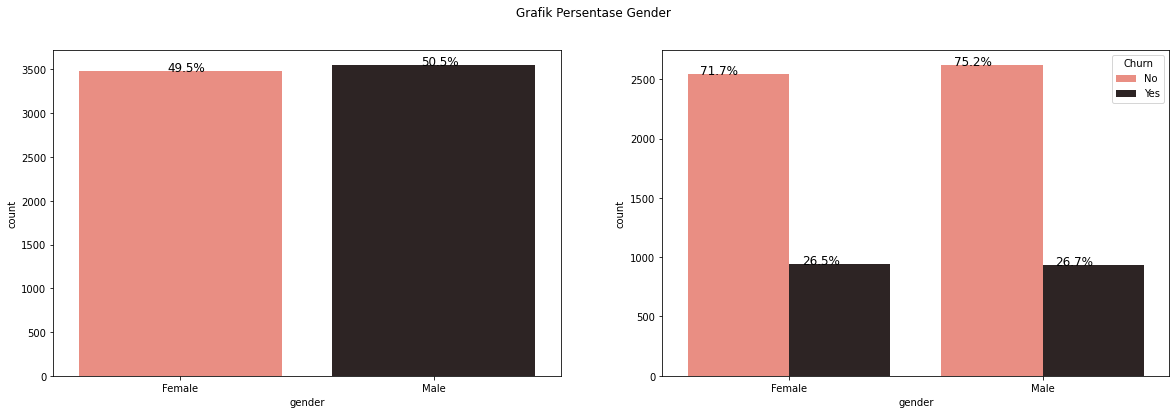

In [108]:
plt.figure(figsize=(20, 6))
plt.suptitle('Grafik Persentase Gender')
plt.subplot(1,2,1)
ax = sns.countplot(data=data, x='gender',  palette='dark:salmon_r')
without_hue(ax, data.gender)

plt.subplot(1,2,2)
ax = sns.countplot(data=data, x='gender', hue='Churn', palette='dark:salmon_r')
with_hue(ax, data.gender, 2, 2)

- Berdasarkan Grafik Persentase Gender, presentase pelanggan pria dan wanita cukup seimbang dengan presentase pria sebesar 50.5% dan wanita sebesar 49.5%, dapat dilihat pula gender tidak berpengaruh terhadap tingginya pelanggan yang berhenti berlangganan, karena persentase wanita dan pria yang churn juga cukup seimbang di angka 26%.

Apakah Senior Citizen berpengaruh terhadap churn

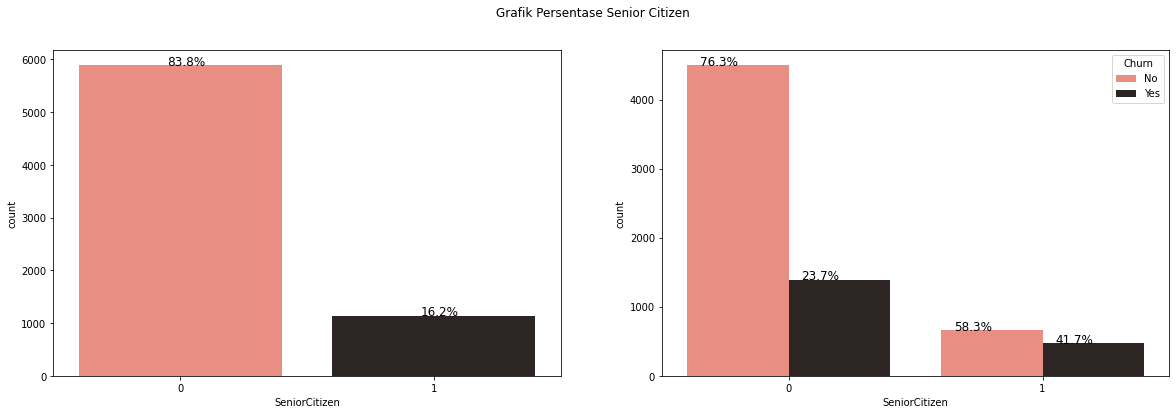

In [109]:
plt.figure(figsize=(20, 6))
plt.suptitle('Grafik Persentase Senior Citizen')
plt.subplot(1,2,1)
ax = sns.countplot(data=data, x='SeniorCitizen', palette='dark:salmon_r')
without_hue(ax, data.SeniorCitizen)

plt.subplot(1,2,2)
ax = sns.countplot(data=data, x='SeniorCitizen', hue='Churn', palette='dark:salmon_r')
with_hue(ax, data.SeniorCitizen, 2, 2)

- Berdasarkan Grafik Persentase Senior Citizen, sebesar 16.2% pelanggan merupakan senior citizen dan 83.8% lainnya bukan, dan pelanggan yang senior citizen cenderung churn lebih tinggi dengan persentase sebesar 41.7% dibandingkan dengan pelanggan yang bukan senior citizen dengan 23.7%.

Apakah jenis layanan internet berpengaruh terhadap churn?

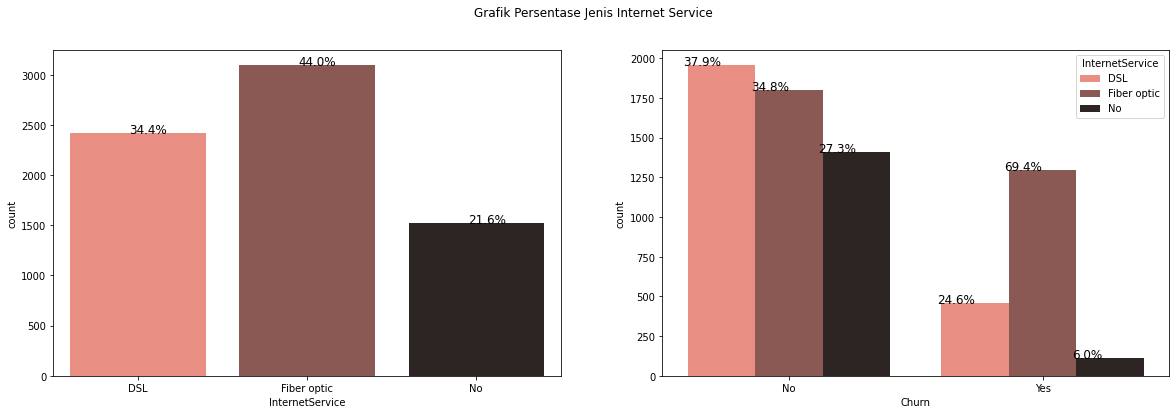

In [110]:
plt.figure(figsize=(20, 6))
plt.suptitle('Grafik Persentase Jenis Internet Service')
plt.subplot(1,2,1)
ax = sns.countplot(data=data, x='InternetService', palette='dark:salmon_r')
without_hue(ax, data.InternetService)

plt.subplot(1,2,2)
ax = sns.countplot(data=data, x='Churn', hue='InternetService', palette='dark:salmon_r')
with_hue(ax, data.Churn, Number_of_categories=2, hue_categories=3)

- Berdasarkan Grafik Persentase Jenis Internet Service, pelanggan dengan layanan internet fiber optic menjadi yang tertinggi persentasenya dengan 44%, layanan DSL dengan 34.4% dan tidak memiliki layanan internet dengan 21.6%. 
- Dapat dilihat pula pelanggan dengan layanan internet fiber optic menjadi yang paling tinggi persentase pelanggan yang churn dengan persentase 69.4% dibandingkan dengan pelanggan layanan internet DSL dengan 24.6%

Apakah tenure berpengaruh terhadap churn?

<AxesSubplot:xlabel='tenure', ylabel='Count'>

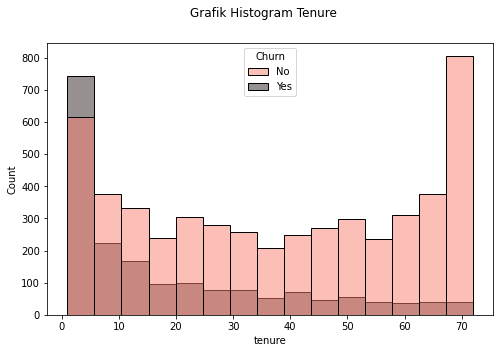

In [111]:
plt.figure(figsize=(8,5))
plt.suptitle('Grafik Histogram Tenure')
sns.histplot(data=data, x='tenure', hue='Churn', palette='dark:salmon_r')

- Dapat dilihat pada Grafik Histogram Tenure, pelanggan dengan bulan berlangganan tinggi cenderung lebih sedikit yang berhenti berlangganan, dan pelanggan dengan bulan berlangganan dibawah 10 bulan yang memiliki tingkat churn tinggi.

Apakah tagihan bulanan berpengaruh terhadap churn?

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

<Figure size 432x288 with 0 Axes>

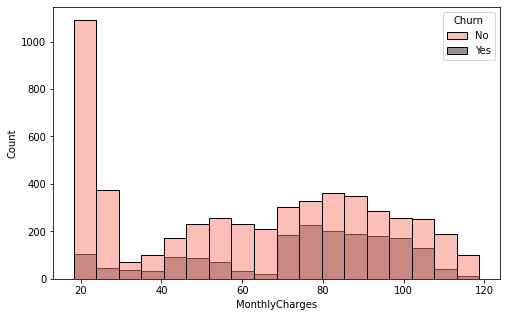

In [112]:
plt.suptitle('Grafik Histogram Monthly Charges')
plt.figure(figsize=(8,5))
sns.histplot(data=data, x='MonthlyCharges', hue='Churn', palette='dark:salmon_r')

- Dapat dilihat dari Grafik Histogram Monthly Charges, pelanggan dengan tingkat churn tinggi terdapat pada pelanggan dengan tagihan yang menengah hingga tinggi.

# Data Preprocessing

## Memisakan Data untuk Model Inference

Membagi data inference untuk menguji model dengan data baru.

In [113]:
# Membagi data Inference dan Data train_test
data_inf = data.sample(20, random_state=4)
data_train_test = data.drop(data_inf.index)
# Reset index pada data Inference dan Data train_test
data_inf.reset_index(drop=True, inplace=True) 
data_train_test.reset_index(drop=True, inplace=True)

data_train_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7007,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.500000,No
7008,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.899902,No
7009,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.450012,No
7010,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.600006,Yes


In [114]:
# X : Feature
# y : label/target
X = data_train_test.drop(['Churn', 'customerID'], axis=1)
y = data_train_test['Churn']
X.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8)

Mendefinisikan numerical column untuk dilakukan penegecekan distribusi data serta outlier dan missing value handling

In [116]:
# Numerical Column 
numerical_col = data[['tenure','MonthlyCharges','TotalCharges']]

Melakukan pengecekan distribusi data

In [117]:
# Input Paramater Distribution  Check
dis_check = numerical_col.skew()

normal_dis = []
skew_dis = []

for i in range(len(dis_check)):
    if dis_check.values[i] < -0.5:
        skew_dis.append(dis_check.index[i])
    elif dis_check.values[i] > 0.5:
        skew_dis.append(dis_check.index[i])
    else:
        normal_dis.append(dis_check.index[i])

Melihat distribusi data

In [118]:
# Skew dist
print('skew_dist :', skew_dis)
print("===================" *10)
# normal_dist
print('normal_dist :',normal_dis)
print("===================" *10)

skew_dist : ['TotalCharges']
normal_dist : ['tenure', 'MonthlyCharges']


- Kolom tenure dan MonthlyCharges merupakan normal distribution data, dan kolom TotalCharges skew distribution data.

## Handle Outlier

In [119]:
# Outliers Detection Function
# for Normally Distributed Data

def detect_normal(df, parameter):
    
    threshold = 3
    mean_ = np.mean(df[parameter])
    std_ = np.std(df[parameter])

    upper_count = df[
                    ((df[parameter]-mean_)/std_) > threshold
                    ][parameter].count()

    bottom_count = df[
                    ((df[parameter]-mean_)/std_) < -threshold
                    ][parameter].count()

    total_count = upper_count + bottom_count

    percentage = (total_count/len(df[parameter])*100).round(2)

    a = ({'Parameter':parameter, 'Total Outliers':total_count, 'Percentage':percentage})

    return print(a)

In [120]:
# Outliers Detection Function
# for Skew Distributed Data

def detect_skew(df, parameter, fold=1.5):
    
    for i in parameter:
        
        IQR = df[parameter].quantile(0.75) - df[parameter].quantile(0.25)
        upper = df[parameter].quantile(0.75) + (fold*IQR)
        bottom = df[parameter].quantile(0.25) - (fold*IQR)

        upper_count = df[
            (df[parameter] > upper)
        ][parameter].count()

        bottom_count = df[
            (df[parameter] < bottom)
        ][parameter].count()
        
        total_count = upper_count + bottom_count

        percentage = (total_count/len(df[parameter])*100).round(2)

        a = ({'Parameter':parameter, 'Total Outliers':total_count, 'Percentage':percentage})

    return print(a)

Check Oulier Normal Dist Data

In [121]:
# Outlier summary
# For normally distributed input parameter

for i in normal_dis:
    detect_normal(X_train, parameter=i)

{'Parameter': 'tenure', 'Total Outliers': 0, 'Percentage': 0.0}
{'Parameter': 'MonthlyCharges', 'Total Outliers': 0, 'Percentage': 0.0}


Check outlier Skewed Dist Data

In [122]:
# Outlier summary
# For skew distributed input parameter

for i in skew_dis:
    detect_skew(X_train, parameter=i)

{'Parameter': 'TotalCharges', 'Total Outliers': 0, 'Percentage': 0.0}


- Tidak terdapat outlier pada data

## Handling Missing Value

In [123]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- sudah tidak terdapat missing value pada data

## Columns categorization

Memisahkan numerical column, dan categorical column nominal dan ordinal

In [124]:
# Numerical Column
numerical = X[['MonthlyCharges','TotalCharges', 'tenure']].columns.tolist()

# Cat column nominal
categorical_nom = X[['gender','PaymentMethod','Contract','InternetService']].columns.tolist()

# Cat column ordinal
categorical_or = X[['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling']].columns.tolist()

## Feature Engineer

In [125]:
# Menggunakan StandarScaller karena data numerical dominan normal distribution
numerical_pipe = make_pipeline(StandardScaler())

# Menggunakan OneHotEncoder untuk data categorical nominal
nominal_pipe = make_pipeline(OneHotEncoder())

# Menggunakan OrdinalEncoder untuk data categorical ordinal
ordinal_pipe = make_pipeline(OrdinalEncoder())

# Label encoder untuk label
label_encoder = LabelEncoder()

data_pipeline = ColumnTransformer([
    ('numerical_pipe', numerical_pipe, numerical),
    ('nominal_pipe', nominal_pipe, categorical_nom),
    ('ordinal_pipe', ordinal_pipe, categorical_or)])

In [126]:
X_train_scaled = data_pipeline.fit_transform(X_train)
X_test_scaled = data_pipeline.transform(X_test)
X_val_scaled = data_pipeline.transform(X_val)

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
y_val = label_encoder.transform(y_val)


## Building Input Pipeline

In [127]:
AUTOTUNE = tf.data.AUTOTUNE

In [128]:
def preprocessing(data, label):
    
    """function that takes the data and labels, 
    standarize the data and return the standarized
    data and the labels"""
    
    mean = tf.reduce_mean(data, axis=0)
    std = tf.math.reduce_std(data, axis=0)
    
    preprocessed_data = (data - mean) / std
    
    return preprocessed_data, label

In [129]:
def get_batches(x, y, shuffle_buffer_size, batch_size, shuffle=False):
    
    #Building a pipeline from a data that exists in memory
    data_ds = tf.data.Dataset.from_tensor_slices((x, y))
    #mapping the fuction we alredy made to the data
    preprocessed_data = data_ds.map(preprocessing)
    
    
    if shuffle:
        # if we want to shuffle the dataset given a buffer size
        shuffled_data = preprocessed_data.shuffle(shuffle_buffer_size)
        
        # prefetch` lets the dataset fetch batches in the background while the model is training.
        data_batches = shuffled_data.batch(batch_size).cache().prefetch(AUTOTUNE) #berapa banyak batch yg ingin di prefetch
        
    else: 
        
        data_batches = preprocessed_data.batch(batch_size).cache().prefetch(AUTOTUNE)
    
    
    return data_batches 

In [130]:
training_data = get_batches(X_train_scaled, y_train, 1024, 64, shuffle=True)
validation_data = get_batches(X_val_scaled, y_val, 256, 64, shuffle=False)
testing_data = get_batches(X_test_scaled, y_test, 256, 64, shuffle=False)

# Modeling

In [131]:
X_train_scaled.shape

(5048, 27)

## Model Sequential

Membangun model sequential dengan 27 node input layer, 2 hidden layer dengan 32 neuron per layer dan 1 output layer. memilih loss fucntion binary_crossentropy karena label merupakan binary, dengan metrics accuracy untuk mengukur outputnya. dilakukan training sebanyak 20 kali dengan batch size 32.

In [132]:
model_seq1 = Sequential()
model_seq1.add(Dense(32, input_shape=(27,)))
model_seq1.add(Dense(32))
model_seq1.add(Dense(1))


model_seq1.compile(loss='binary_crossentropy',
              metrics=['accuracy'])


history_seq1 = model_seq1.fit(training_data, epochs=20, batch_size=32,
                    validation_data=validation_data,
                    verbose=1)

Epoch 1/20
79/79 [==============================] - 1s 7ms/step - loss: 3.6093 - accuracy: 0.7233 - val_loss: 2.8894 - val_accuracy: 0.7575
Epoch 2/20
79/79 [==============================] - 0s 4ms/step - loss: 3.1758 - accuracy: 0.7407 - val_loss: 3.0005 - val_accuracy: 0.7290
Epoch 3/20
79/79 [==============================] - 0s 4ms/step - loss: 2.9960 - accuracy: 0.7237 - val_loss: 2.5991 - val_accuracy: 0.7789
Epoch 4/20
79/79 [==============================] - 0s 4ms/step - loss: 2.6516 - accuracy: 0.7447 - val_loss: 2.2096 - val_accuracy: 0.7742
Epoch 5/20
79/79 [==============================] - 0s 4ms/step - loss: 2.0827 - accuracy: 0.7730 - val_loss: 1.7454 - val_accuracy: 0.7702
Epoch 6/20
79/79 [==============================] - 0s 4ms/step - loss: 1.4661 - accuracy: 0.7639 - val_loss: 1.1567 - val_accuracy: 0.7750
Epoch 7/20
79/79 [==============================] - 0s 4ms/step - loss: 0.9931 - accuracy: 0.7656 - val_loss: 0.7633 - val_accuracy: 0.7750
Epoch 8/20
79/79 [==

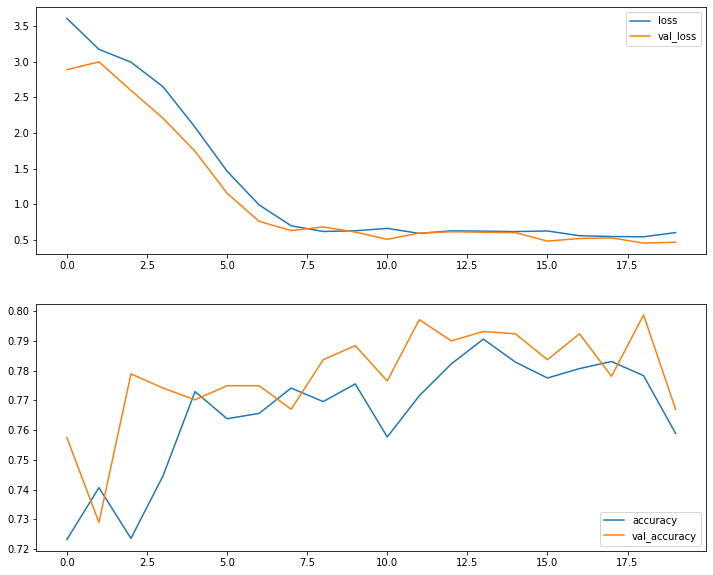

In [133]:
metrics_seq1 = pd.DataFrame(history_seq1.history)

fig, axs = plt.subplots(2, figsize=(12,10))
axs[0].plot(metrics_seq1[['loss', 'val_loss']], label=['loss', 'val_loss'])
axs[0].legend(loc='upper right')
axs[1].plot(metrics_seq1[['accuracy', 'val_accuracy']], label=['accuracy', 'val_accuracy'])
axs[1].legend(loc='lower right')


- Berdasarkan grafik perbandingan loss pada train data dan validation data pada model sequential, dapat dilihat loss pada percobaan dibawah 5 masih tinggi dan terus menurun hingga 0.5, dan loss antara train data dan val data cenderung konvergen.
- Pada grafik perbandingan accurasi train data dan validation data pada model sequential, accuracy tertinggi mendekati 0.8, tetapi grafik masih memiliki nilai naik turun yang drastis antar percobaannya, masih perlu dilakukan model improvement

## Model Functional

Membangun model Functional API dengan 27 node input layer, 1 hidden layer dengan 32 neuron, 1 concat layer dan 1 output layer. memilih loss fucntion binary_crossentropy karena label merupakan binary, dengan metrics accuracy untuk mengukur outputnya. dilakukan training sebanyak 20 kali.

In [134]:
input_ = Input(shape=(27,))
hidden1 = Dense(32)(input_)
concat = concatenate([input_, hidden1])
output = Dense(1)(concat)
model_func1 = Model(inputs=[input_], outputs=[output])

model_func1.compile(loss='binary_crossentropy',
              metrics=['accuracy'])
              
history_func1 = model_func1.fit(training_data, epochs=20,
                    validation_data=validation_data,
                    verbose=1)

Epoch 1/20
79/79 [==============================] - 1s 4ms/step - loss: 2.5002 - accuracy: 0.7383 - val_loss: 2.0894 - val_accuracy: 0.7631
Epoch 2/20
79/79 [==============================] - 0s 3ms/step - loss: 2.0684 - accuracy: 0.7666 - val_loss: 1.7801 - val_accuracy: 0.7702
Epoch 3/20
79/79 [==============================] - 0s 4ms/step - loss: 1.7700 - accuracy: 0.7660 - val_loss: 1.8233 - val_accuracy: 0.7567
Epoch 4/20
79/79 [==============================] - 0s 3ms/step - loss: 1.5868 - accuracy: 0.7708 - val_loss: 1.3907 - val_accuracy: 0.7710
Epoch 5/20
79/79 [==============================] - 0s 3ms/step - loss: 1.3022 - accuracy: 0.7833 - val_loss: 1.2701 - val_accuracy: 0.7916
Epoch 6/20
79/79 [==============================] - 0s 3ms/step - loss: 1.2251 - accuracy: 0.7863 - val_loss: 1.2120 - val_accuracy: 0.7940
Epoch 7/20
79/79 [==============================] - 0s 4ms/step - loss: 1.2148 - accuracy: 0.7962 - val_loss: 1.2197 - val_accuracy: 0.7900
Epoch 8/20
79/79 [==

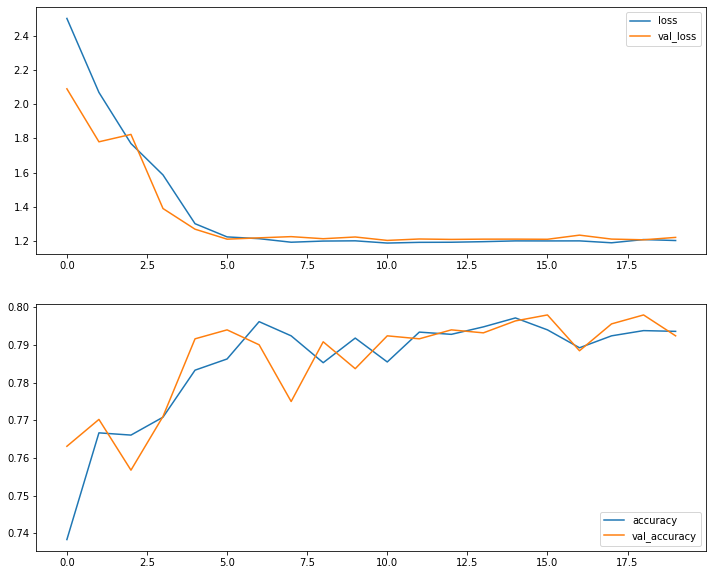

In [135]:
metrics_func1 = pd.DataFrame(history_func1.history)

fig, axs = plt.subplots(2, figsize=(12,10))
axs[0].plot(metrics_func1[['loss', 'val_loss']], label=['loss', 'val_loss'])
axs[0].legend(loc='upper right')
axs[1].plot(metrics_func1[['accuracy', 'val_accuracy']], label=['accuracy', 'val_accuracy'])
axs[1].legend(loc='lower right')



- Berdasarkan grafik perbandingan loss pada train data dan validation data pada model functional, dapat dilihat loss pada percobaan dibawah 5 juga masih tinggi dan terus menurun hingga 1.2, dan loss antara train data dan val data sudah konvergen.
- Pada grafik perbandingan accurasi train data dan validation data, accuracy tertinggi mendekati 0.8, tetapi grafik masih memiliki nilai naik turun yang drastis antar percobaannya, masih perlu dilakukan model improvement

# Model Improvement

## Model Sequential

Membangun model improvement sequential dengan 27 node input layer, 3 hidden layer dengan 32 neuron pada layer 1, 16 neuron pada layer 2, dan 4 neuron pada layer 3 serta 1 output layer. menggunakan activation function relu pada hidden layer, dan activation function sigmoid pada output layer, memilih loss fucntion binary_crossentropy karena label merupakan binary, ditambahkan optimizer Adamax, dan menggunakan metrics accuracy untuk mengukur outputnya. dilakukan training sebanyak 70 kali dengan batch size 20.

In [160]:
model_seq2 = Sequential()
model_seq2.add(Dense(32, activation='relu', input_shape=(27,)))
model_seq2.add(Dense(16, activation='relu'))
model_seq2.add(Dense(4, activation='relu'))
model_seq2.add(Dense(1, activation='sigmoid'))

model_seq2.compile(loss='binary_crossentropy',
              optimizer=Adamax(),
              metrics=['accuracy'])

history_seq2 = model_seq2.fit(training_data, epochs=70, batch_size=20,
                    validation_data=validation_data,
                    verbose=1)

Epoch 1/70
79/79 [==============================] - 1s 6ms/step - loss: 0.5795 - accuracy: 0.7239 - val_loss: 0.5012 - val_accuracy: 0.7401
Epoch 2/70
79/79 [==============================] - 0s 4ms/step - loss: 0.4787 - accuracy: 0.7544 - val_loss: 0.4559 - val_accuracy: 0.7472
Epoch 3/70
79/79 [==============================] - 0s 4ms/step - loss: 0.4524 - accuracy: 0.7769 - val_loss: 0.4379 - val_accuracy: 0.7750
Epoch 4/70
79/79 [==============================] - 0s 3ms/step - loss: 0.4400 - accuracy: 0.7928 - val_loss: 0.4288 - val_accuracy: 0.7861
Epoch 5/70
79/79 [==============================] - 0s 4ms/step - loss: 0.4336 - accuracy: 0.7950 - val_loss: 0.4241 - val_accuracy: 0.7876
Epoch 6/70
79/79 [==============================] - 0s 3ms/step - loss: 0.4293 - accuracy: 0.7995 - val_loss: 0.4211 - val_accuracy: 0.7876
Epoch 7/70
79/79 [==============================] - 0s 3ms/step - loss: 0.4261 - accuracy: 0.7993 - val_loss: 0.4193 - val_accuracy: 0.7845
Epoch 8/70
79/79 [==

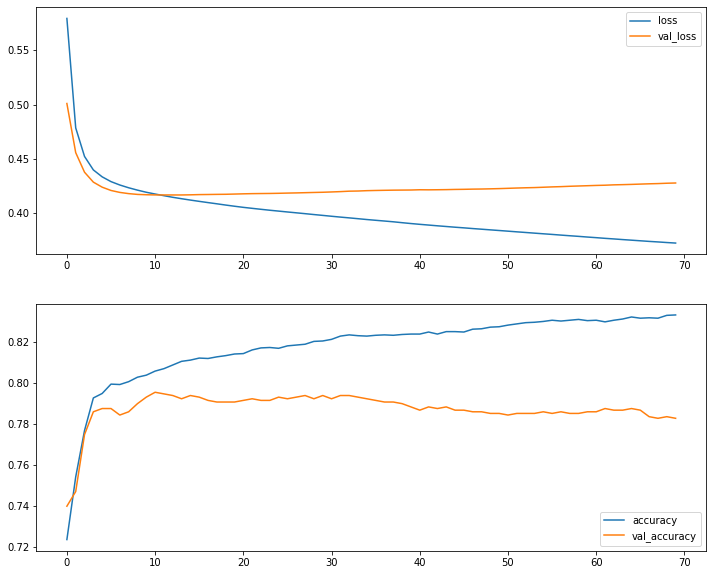

In [161]:
metrics_seq2 = pd.DataFrame(history_seq2.history)

fig, axs = plt.subplots(2, figsize=(12,10))

axs[0].plot(metrics_seq2[['loss', 'val_loss']], label=['loss', 'val_loss'])
axs[0].legend(loc='upper right')

axs[1].plot(metrics_seq2[['accuracy', 'val_accuracy']], label=['accuracy', 'val_accuracy'])
axs[1].legend(loc='lower right')


- pada model Sequential setelah dilakukan improvement dengan menambahkan hidden layer dan actifation function, model menjadi lebih stabil, dapat dilihat dari grafik accuracy, tidak terjadi lagi kenaikan dan penurunan nilai accuracy yang tinggi seperti pada model sequential sebelum dilakuakn model improvement. dengan nilai accuracy tertinggi mencapai 0.83

## Model Functional

Membangun model Improvement Functional API dengan 27 node input layer, 1 hidden layer dengan 32 neuron, 1 concat layer dan 1 output layer, menambahkan activation function relu pada hidden layer dan sigmoid pada output layer. memilih loss fucntion binary_crossentropy karena label merupakan binary, dengan metrics accuracy untuk mengukur outputnya. dilakukan training sebanyak 70 kali, ditambahkan pula optimizer Adamax agar mendapat hasil lebih baik.

In [162]:
input_ = Input(shape=(27,))
hidden1 = Dense(32, activation="relu")(input_)
concat = concatenate([input_, hidden1])
output = Dense(1, activation='sigmoid')(concat)
model_func2 = Model(inputs=[input_], outputs=[output])


model_func2.compile(loss='binary_crossentropy',
              optimizer=Adamax(),
              metrics=['accuracy'])
              

history_func2 = model_func2.fit(training_data, epochs=70,
                    validation_data=validation_data,
                    verbose=1)

Epoch 1/70
79/79 [==============================] - 1s 4ms/step - loss: 0.7658 - accuracy: 0.5442 - val_loss: 0.5867 - val_accuracy: 0.7068
Epoch 2/70
79/79 [==============================] - 0s 3ms/step - loss: 0.5360 - accuracy: 0.7328 - val_loss: 0.4797 - val_accuracy: 0.7631
Epoch 3/70
79/79 [==============================] - 0s 3ms/step - loss: 0.4761 - accuracy: 0.7688 - val_loss: 0.4450 - val_accuracy: 0.7813
Epoch 4/70
79/79 [==============================] - 0s 3ms/step - loss: 0.4548 - accuracy: 0.7775 - val_loss: 0.4307 - val_accuracy: 0.7853
Epoch 5/70
79/79 [==============================] - 0s 3ms/step - loss: 0.4444 - accuracy: 0.7841 - val_loss: 0.4235 - val_accuracy: 0.7900
Epoch 6/70
79/79 [==============================] - 0s 3ms/step - loss: 0.4381 - accuracy: 0.7886 - val_loss: 0.4193 - val_accuracy: 0.7861
Epoch 7/70
79/79 [==============================] - 0s 3ms/step - loss: 0.4337 - accuracy: 0.7922 - val_loss: 0.4165 - val_accuracy: 0.7908
Epoch 8/70
79/79 [==

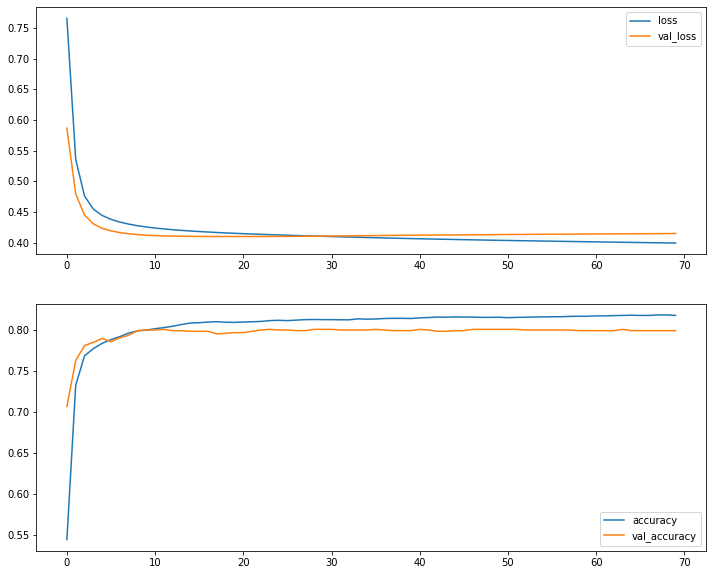

In [163]:
metrics_func2 = pd.DataFrame(history_func2.history)

fig, axs = plt.subplots(2, figsize=(12,10))
axs[0].plot(metrics_func2[['loss', 'val_loss']], label=['loss', 'val_loss'])
axs[0].legend(loc='upper right')
axs[1].plot(metrics_func2[['accuracy', 'val_accuracy']], label=['accuracy', 'val_accuracy'])
axs[1].legend(loc='lower right')

- Setelah dilakuakan model improvement dengan menambahkan activation function relu pada hidden layer, sigmoid pada output layer dan optimizer Adamax, accuracy yang didapat pada train set dan validation set lebih stabil dan konvergen, loss yang didapat juga menurun dengan loss terkecil 0.4.

## Evaluation

Melihat clasification report pada model setelah dilakukan improvement dan mencoba pada data test. Treshold 0.3 dipilih karena data imbalance antara kelas 1 dan 0

In [199]:
y_pred_seq2 = model_seq2.predict(X_test_scaled)
y_pred_seq2 = np.where(y_pred_seq2 > 0.3, 1, 0)
print('Model Sequential')
print(classification_report(y_test, y_pred_seq2))

22/22 [==============================] - 0s 1ms/step
Model Sequential
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       511
           1       0.56      0.73      0.64       191

    accuracy                           0.77       702
   macro avg       0.73      0.76      0.74       702
weighted avg       0.80      0.77      0.78       702



In [200]:
y_pred_func2 = model_func2.predict(X_test_scaled)
y_pred_func2 = np.where(y_pred_func2 > 0.3, 1, 0)
print('Model Functional')
print(classification_report(y_test, y_pred_func2))

22/22 [==============================] - 0s 2ms/step
Model Functional
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       511
           1       0.58      0.68      0.63       191

    accuracy                           0.78       702
   macro avg       0.73      0.75      0.74       702
weighted avg       0.79      0.78      0.79       702



- Berdasarkan Classfication Report, model functional lebih tinggi nilai accuracynya dibandingkan model sequential, tetapi model sequential memiliki nilai recall pada kelas 1 lebih tinggi dengan nilai 0.73 dibandingkan model functional dengan 0.68, itu artinya model sequential lebih baik dalam memprediksi TP(True positive) pada kelas 1 dengan baik dibandingkan model functional.

<AxesSubplot:>

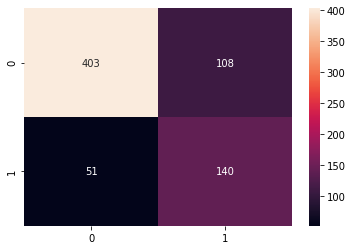

In [201]:
cf_matrix = confusion_matrix(y_test, y_pred_seq2)
sns.heatmap(cf_matrix, annot=True,fmt="d")

<AxesSubplot:>

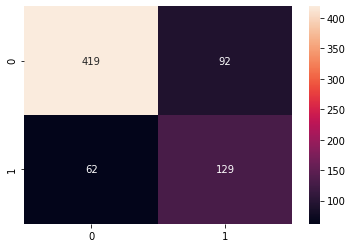

In [202]:
cf_matrix = confusion_matrix(y_test, y_pred_func2)
sns.heatmap(cf_matrix, annot=True,fmt="d")

- Berdasarkan confusion matrix, nilai TP model Sequential lebih tinggi dengan 140 data diprediksi TP, dari model functional dengan 129 data diprediksi TP. jadi dipilihlah model sequential untuk menjadi model akhir untuk memprediksi apakah customer akan berhenti berlangganan atau tidak dari layanan telco.

# Model Infernce

Membagi data inference menjadi X(feature) dan y(target)

In [217]:
# Splitting Dataset

# X will be consist of input parameter only
X_inf = data_inf.drop(['Churn'], axis=1)

# y will be consist of target parameter only
y_inf = data_inf['Churn']

Melakuakan scaling dan encoding pada data infernece

In [218]:
X_inf_scaled = data_pipeline.transform(X_inf)

y_inf = label_encoder.transform(y_inf)

Melakukan prediksi pada data inference

In [219]:
y_pred_inf = model_seq2.predict(X_inf_scaled)
y_pred_inf = np.where(y_pred_inf > 0.3, 1, 0)
y_pred_inf_decode = label_encoder.inverse_transform(y_pred_inf)

1/1 [==============================] - 0s 14ms/step


c:\Users\rioar\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [220]:
y_pred_inf_df = pd.DataFrame(y_pred_inf_decode, columns=['Prediction'])
y_pred_inf_df

,Prediction
0,No
1,No
2,No
3,Yes
4,Yes
5,No
6,No
7,No
8,No
9,Yes


In [221]:
pd.concat([data_inf, y_pred_inf_df], axis=1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Prediction
0,8008-ESFLK,Female,0,Yes,No,53,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,110.50,5835.500000,No,No
1,6791-YBNAK,Male,0,Yes,Yes,18,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic),25.55,467.850006,No,No
2,8169-SAEJD,Male,1,Yes,No,69,No,No phone service,DSL,Yes,Yes,No,No,Yes,Yes,Two year,No,Credit card (automatic),56.55,3952.649902,No,No
3,9804-ICWBG,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.900002,Yes,Yes
4,8008-HAWED,Male,0,No,No,14,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,50.75,712.750000,Yes,Yes
5,1120-BMWUB,Female,0,No,No,16,Yes,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,Yes,Mailed check,53.90,834.150024,Yes,No
6,7317-GGVPB,Male,0,Yes,No,71,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),108.60,7690.899902,Yes,No
7,3511-BFTJW,Male,0,Yes,Yes,72,No,No phone service,DSL,Yes,Yes,Yes,No,No,No,Two year,No,Credit card (automatic),38.50,2763.000000,No,No
8,7869-ZYDST,Male,0,Yes,No,31,Yes,Yes,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),59.05,1882.800049,No,No
9,7439-DKZTW,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.55,80.550003,No,Yes


- Data inference berhasil diprediski

# Model Saving

Melakukan model saving agar bisa dilakuakan depoyment model di website.

In [225]:
# freeze model
for layer in model_seq2.layers:
  layer.trainable = False

In [226]:
model_seq2.save("churn")

INFO:tensorflow:Assets written to: churn\assets


In [247]:
with open("preprop.pkl", "wb") as model_file:
    pickle.dump(data_pipeline, model_file)


# Kesimpulan

`EDA`
- Mengganti tipe data pada kolom TotalCharges karena kolom TotalCharges bertipe data object, tetapi seharusnya bertipe data int atau float karena data merupakan data numeric.
- Sebesar 73.4% pelanggan tetap menggunakan produk yang kita tawarkan sedangkan 26.6% pelanggan akan berhenti berlangganan.
- Berdasarkan Grafik Persentase Payment Method, terlihat pelanggan yang membayar tagihan dengan electronic check menjadi yang tertinggi di data dengan 33.6% dan yang terendah adalah dengan credit card (auto) dengan 21.6%.
- Dapat dilihat pula pelanggan dengan yang membayar tagihan dengan electronic check juga menjadi pelanggan yang paling tinggi persentase churnnya dengan persentase sebesar 45.3% pelanggan akan churn, sedangkan pelanggan dengan loyalitas tinggi adalah pelanggan dengan metode pembayaran credit card (auto) dengan presentase 15.3% yang berhenti berlangganan dan 84.7% yang masih tetap berlangganan.
- Berdasarkan Grafik Persentase Gender, presentase pelanggan pria dan wanita cukup seimbang dengan presentase pria sebesar 50.5% dan wanita sebesar 49.5%, dapat dilihat pula gender tidak berpengaruh terhadap tingginya pelanggan yang berhenti berlangganan, karena persentase wanita dan pria yang churn juga cukup seimbang di angka 26%.
- Berdasarkan Grafik Persentase Senior Citizen, sebesar 16.2% pelanggan merupakan senior citizen dan 83.8% lainnya bukan, dan pelanggan yang senior citizen cenderung churn lebih tinggi dengan persentase sebesar 41.7% dibandingkan dengan pelanggan yang bukan senior citizen dengan 23.7%.
- Berdasarkan Grafik Persentase Jenis Internet Service, pelanggan dengan layanan internet fiber optic menjadi yang tertinggi persentasenya dengan 44%, layanan DSL dengan 34.4% dan tidak memiliki layanan internet dengan 21.6%. 
- Dapat dilihat pula pelanggan dengan layanan internet fiber optic menjadi yang paling tinggi persentase pelanggan yang churn dengan persentase 69.4% dibandingkan dengan pelanggan layanan internet DSL dengan 24.6%
- Dapat dilihat pada Grafik Histogram Tenure, pelanggan dengan bulan berlangganan tinggi cenderung lebih sedikit yang berhenti berlangganan, dan pelanggan dengan bulan berlangganan dibawah 10 bulan yang memiliki tingkat churn tinggi.
- Dapat dilihat dari Grafik Histogram Monthly Charges, pelanggan dengan tingkat churn tinggi terdapat pada pelanggan dengan tagihan yang menengah hingga tinggi.

`Modeling`
- Membangun model sequential dengan 27 node input layer, 2 hidden layer dengan 32 neuron per layer dan 1 output layer. memilih loss fucntion binary_crossentropy karena label merupakan binary, dengan metrics accuracy untuk mengukur outputnya. dilakukan training sebanyak 20 kali dengan batch size 32.
- Berdasarkan grafik perbandingan loss pada train data dan validation data pada model sequential, dapat dilihat loss pada percobaan dibawah 5 masih tinggi dan terus menurun hingga 0.5, dan loss antara train data dan val data cenderung konvergen.
- Pada grafik perbandingan accurasi train data dan validation data pada model sequential, accuracy tertinggi mendekati 0.8, tetapi grafik masih memiliki nilai naik turun yang drastis antar percobaannya, masih perlu dilakukan model improvement
- Membangun model Functional API dengan 27 node input layer, 1 hidden layer dengan 32 neuron, 1 concat layer dan 1 output layer. memilih loss fucntion binary_crossentropy karena label merupakan binary, dengan metrics accuracy untuk mengukur outputnya. dilakukan training sebanyak 20 kali.
- Berdasarkan grafik perbandingan loss pada train data dan validation data pada model functional, dapat dilihat loss pada percobaan dibawah 5 juga masih tinggi dan terus menurun hingga 1.2, dan loss antara train data dan val data sudah konvergen.
- Pada grafik perbandingan accurasi train data dan validation data, accuracy tertinggi mendekati 0.8, tetapi grafik masih memiliki nilai naik turun yang drastis antar percobaannya, masih perlu dilakukan model improvement
- Membangun model improvement sequential dengan 27 node input layer, 3 hidden layer dengan 32 neuron pada layer 1, 16 neuron pada layer 2, dan 4 neuron pada layer 3 serta 1 output layer. menggunakan activation function relu pada hidden layer, dan activation function sigmoid pada output layer, memilih loss fucntion binary_crossentropy karena label merupakan binary, ditambahkan optimizer Adamax, dan menggunakan metrics accuracy untuk mengukur outputnya. dilakukan training sebanyak 70 kali dengan batch size 20.
- pada model Sequential setelah dilakukan improvement dengan menambahkan hidden layer dan actifation function, model menjadi lebih stabil, dapat dilihat dari grafik accuracy, tidak terjadi lagi kenaikan dan penurunan nilai accuracy yang tinggi seperti pada model sequential sebelum dilakuakn model improvement. dengan nilai accuracy tertinggi mencapai 0.83
- Membangun model Improvement Functional API dengan 27 node input layer, 1 hidden layer dengan 32 neuron, 1 concat layer dan 1 output layer, menambahkan activation function relu pada hidden layer dan sigmoid pada output layer. memilih loss fucntion binary_crossentropy karena label merupakan binary, dengan metrics accuracy untuk mengukur outputnya. dilakukan training sebanyak 70 kali, ditambahkan pula optimizer Adamax agar mendapat hasil lebih baik.
- Setelah dilakuakan model improvement dengan menambahkan activation function relu pada hidden layer, sigmoid pada output layer dan optimizer Adamax, accuracy yang didapat pada train set dan validation set lebih stabil dan konvergen, loss yang didapat juga menurun dengan loss terkecil 0.4.
- Melihat clasification report pada model setelah dilakukan improvement dan mencoba pada data test. Treshold 0.3 dipilih karena data imbalance antara kelas 1 dan 0
- Berdasarkan Classfication Report, model functional lebih tinggi nilai accuracynya dibandingkan model sequential, tetapi model sequential memiliki nilai recall pada kelas 1 lebih tinggi dengan nilai 0.73 dibandingkan model functional dengan 0.68, itu artinya model sequential lebih baik dalam memprediksi TP(True positive) pada kelas 1 dengan baik dibandingkan model functional.
- Berdasarkan confusion matrix, nilai TP model Sequential lebih tinggi dengan 140 data diprediksi TP, dari model functional dengan 129 data diprediksi TP. jadi dipilihlah model sequential untuk menjadi model akhir untuk memprediksi apakah customer akan berhenti berlangganan atau tidak dari layanan telco.
- Model berhasil dibuat dan berhasil memprediksi pelanggan yang akan berhenti berlangganan produk telco agar bisa dilakukan tindakan preventif agar pelanggan tetap berlangganan produk telco.

# Referensi

Function inpur pipeline : https://www.kaggle.com/code/sardiirfansyah/tensorflow-input-pipeline-prefetch-tf-data

https://colab.research.google.com/drive/1anbQI3r7Tt_SfPD2pW7uaNGlV6_Tdy95?usp=sharing#scrollTo=Nz4XBuLdRm29

https://colab.research.google.com/drive/1mAWGh27QOQULHHqKqaUiz60xtbwD5q3W?usp=sharing#scrollTo=WJ5ffV6VJrUY